In [1]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2023-09-18 05:55:54--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2023-09-18 05:55:54 (4.09 MB/s) - ‘insurance.csv’ saved [54288/54288]



# Regresión Lineal Multivariante

## 1. Cargamos el dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Eliminamos las columnas que no vamos a usar

In [3]:
df = data.drop(columns='region')

### Transformamos las variables de cualitativas a cuantitativas

In [4]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df.head(5)

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


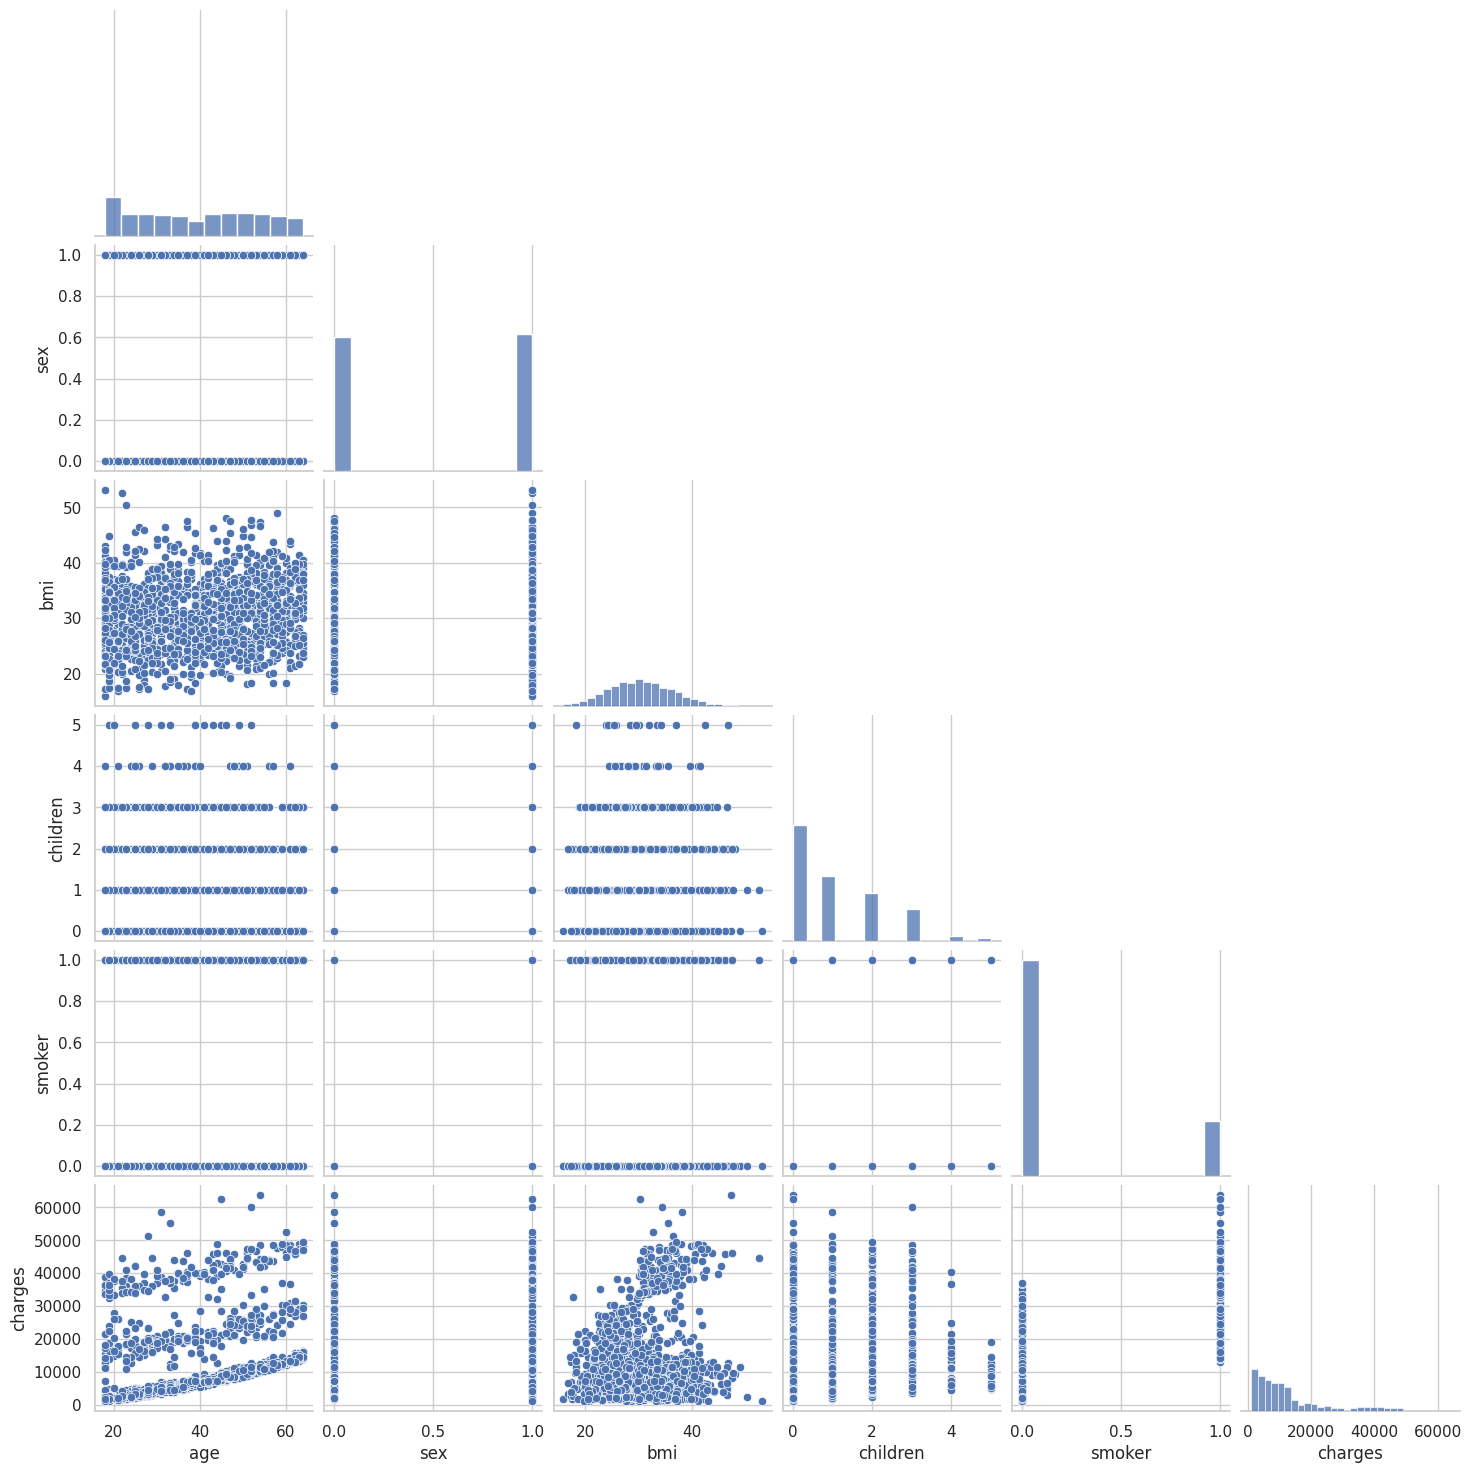

In [6]:
sns.pairplot(df, corner=True)

## 2. Elegimos las variables

In [7]:
X = df[['age', 'bmi', 'children', 'sex', 'smoker']].to_numpy()
y = df['charges'].to_numpy()

### Observamos 5 ejemplos de los datos en X e y, también observamos el formato y la cantidad de datos que hay en cada variable

In [8]:
print(f"X ('age', 'bmi', 'children', 'sex', 'smoker') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)} | 5 ejemplos se ven así: \n{X[:5]}\n")
print(f"Y ('charges') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)} | 5 ejemplos se ven así: \n{y[:5]}")

X ('age', 'bmi', 'children', 'sex', 'smoker') tiene la forma: (1338, 5) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: 
[[19.    27.9    0.     0.     1.   ]
 [18.    33.77   1.     1.     0.   ]
 [28.    33.     3.     1.     0.   ]
 [33.    22.705  0.     1.     0.   ]
 [32.    28.88   0.     1.     0.   ]]

Y ('charges') tiene la forma: (1338,) | posee cantidad de datos: 1338 | 5 ejemplos se ven así: 
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


## 3. Analizamos el dataset

### 1. Normalidad de los datos.

In [9]:
from scipy.stats import shapiro

normalidad_x_age = shapiro(X[:,0])
normalidad_x_bmi = shapiro(X[:,1])
normalidad_x_children = shapiro(X[:,2])
normalidad_x_sex = shapiro(X[:,3])
normalidad_x_smoker = shapiro(X[:,4])
normalidad_y = shapiro(y)

print(f"Normalidad de X: {normalidad_x_age}")
print(f"Normalidad de X: {normalidad_x_bmi}")
print(f"Normalidad de X: {normalidad_x_children}")
print(f"Normalidad de X: {normalidad_x_sex}")
print(f"Normalidad de X: {normalidad_x_smoker}")
print(f"Normalidad de Y: {normalidad_y}")

Normalidad de X: ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Normalidad de X: ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
Normalidad de X: ShapiroResult(statistic=0.8231810331344604, pvalue=5.06690727121734e-36)
Normalidad de X: ShapiroResult(statistic=0.6365700960159302, pvalue=0.0)
Normalidad de X: ShapiroResult(statistic=0.4950329065322876, pvalue=0.0)
Normalidad de Y: ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)


>**Nota:** vemos que para ambos conjuntos de datos X e y, el p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal. Al saber que no se distribuyen de forma normal no se puede hacer un teste de correlación de Pearson, pero si tal vez de Kendall.

### 2. Vemos como se distribuyen ambos conjuntos de datos X e y.

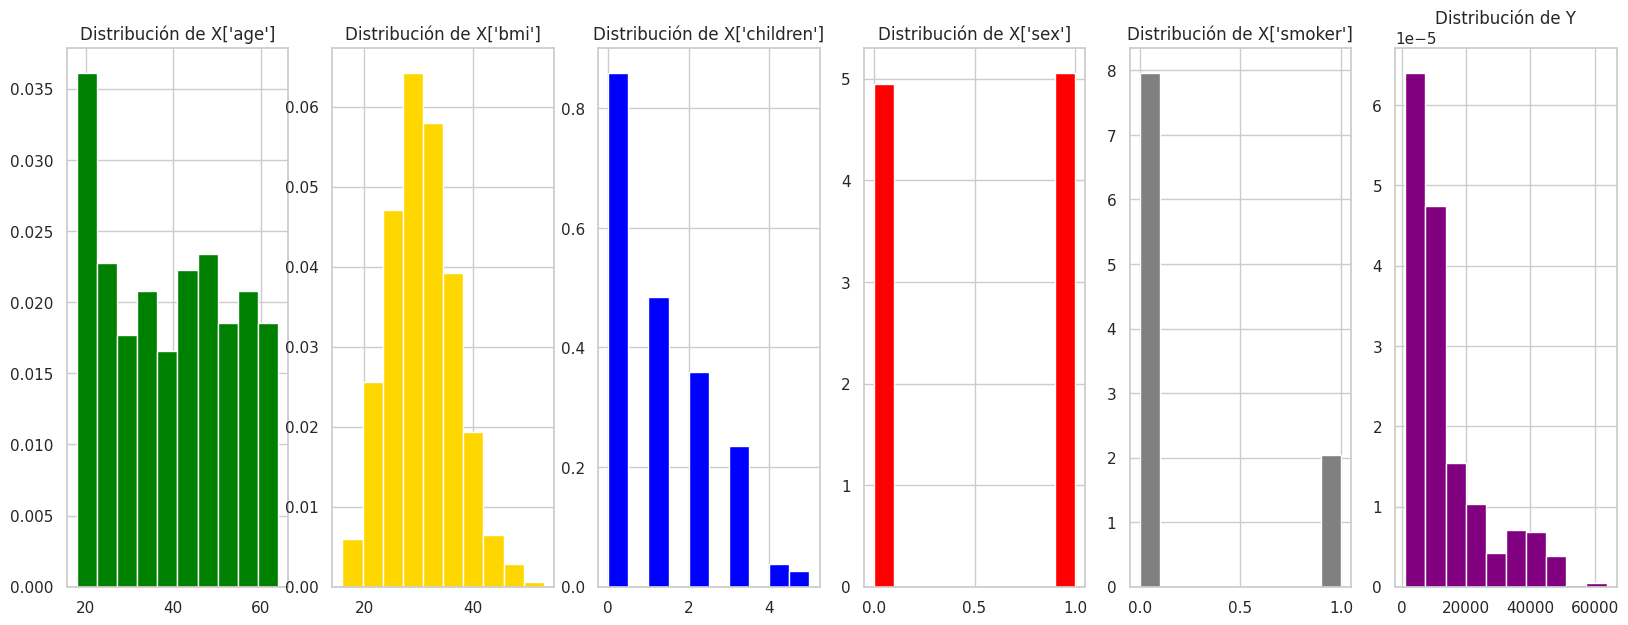

In [10]:
plt.figure(figsize=(20,7))
plt.subplot(1,6,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['age']")
plt.subplot(1,6,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['bmi']")
plt.subplot(1,6,3)
plt.hist(X[:,2],color='blue',density=True)
plt.title("Distribución de X['children']")
plt.subplot(1,6,4)
plt.hist(X[:,3],color='red',density=True)
plt.title("Distribución de X['sex']")
plt.subplot(1,6,5)
plt.hist(X[:,4],color='gray',density=True)
plt.title("Distribución de X['smoker']")
plt.subplot(1,6,6)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de Y");

### 3. Vamos si se correlacionan

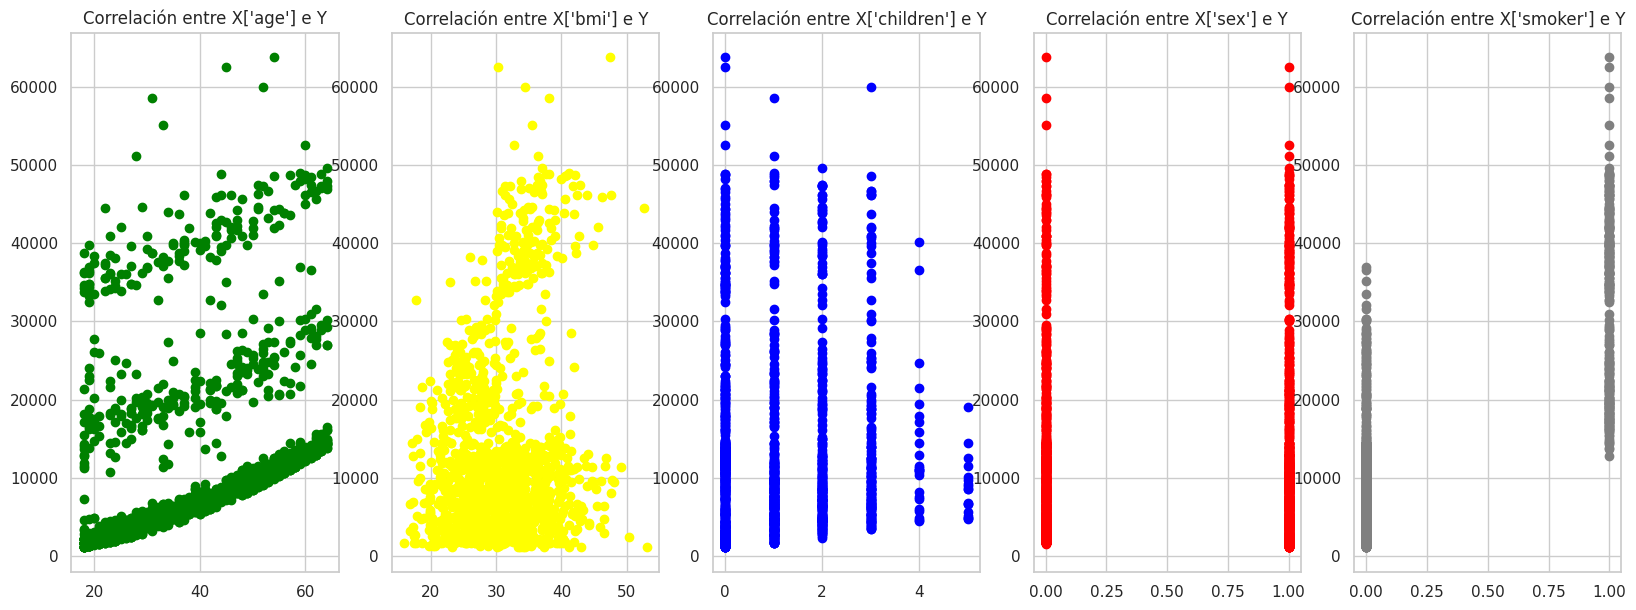

In [11]:
plt.figure(figsize=(20,7))
plt.subplot(1,5,1)
plt.scatter(X[:,0],y,color='green')
plt.title("Correlación entre X['age'] e Y")
plt.subplot(1,5,2)
plt.scatter(X[:,1],y,color='yellow')
plt.title("Correlación entre X['bmi'] e Y");
plt.subplot(1,5,3)
plt.scatter(X[:,2],y,color='blue')
plt.title("Correlación entre X['children'] e Y");
plt.subplot(1,5,4)
plt.scatter(X[:,3],y,color='red')
plt.title("Correlación entre X['sex'] e Y");
plt.subplot(1,5,5)
plt.scatter(X[:,4],y,color='grey')
plt.title("Correlación entre X['smoker'] e Y");

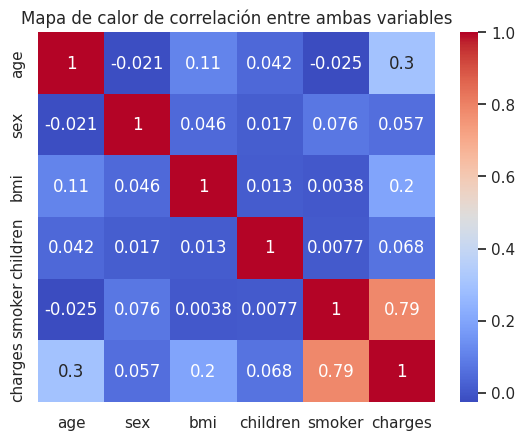

In [12]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

## 4. Separamos el dataset en entrenamiento y testeo



In [13]:
X = df[['age', 'bmi', 'children', 'sex', 'smoker']]
y = df['charges']

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

### Transformamos los datos

In [15]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer((MinMaxScaler(), ['age','bmi','children']),(OneHotEncoder(handle_unknown='ignore'),['sex','smoker']))
X_train_norm = ct.fit_transform(Xtrain)
X_test_norm = ct.transform(Xtest)

### Vemos las especificaciones de cada conjunto de datos formados


In [16]:
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003, 5) | ytrain shape (1003,)
Xtest shape: (335, 5) | ytest shape (335,)


### Vemos gráficamente como queda el dataset separado en entrenamiento y testeo


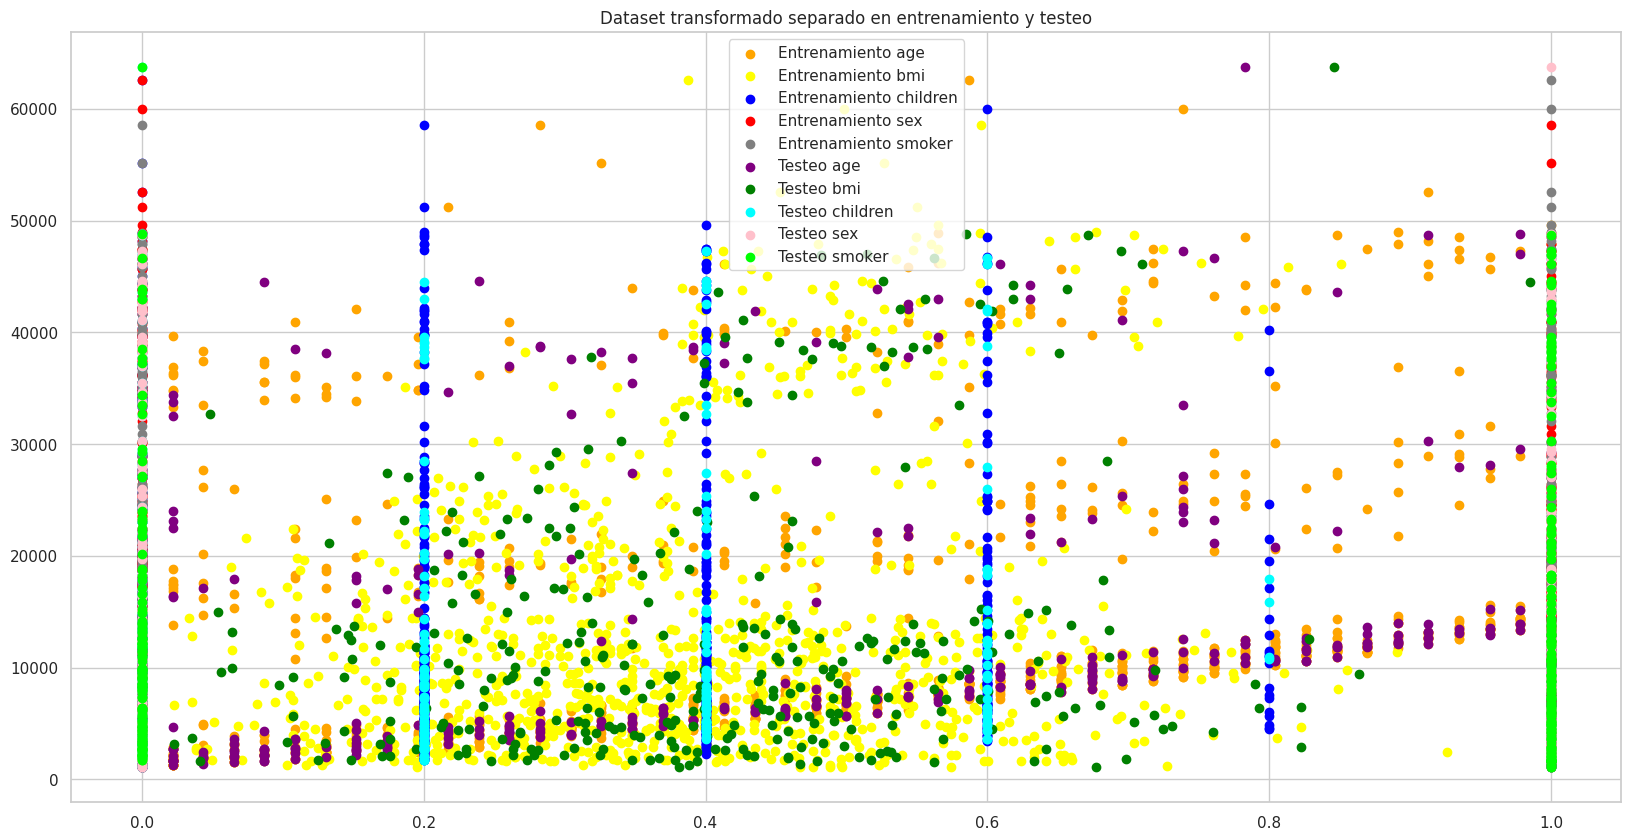

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(X_train_norm[:,0],ytrain,c='orange',label='Entrenamiento age')
plt.scatter(X_train_norm[:,1],ytrain,c='yellow',label='Entrenamiento bmi')
plt.scatter(X_train_norm[:,2],ytrain,c='blue',label='Entrenamiento children')
plt.scatter(X_train_norm[:,3],ytrain,c='red',label='Entrenamiento sex')
plt.scatter(X_train_norm[:,4],ytrain,c='gray',label='Entrenamiento smoker')

plt.scatter(X_test_norm[:,0],ytest,c='purple',label='Testeo age')
plt.scatter(X_test_norm[:,1],ytest,c='green',label='Testeo bmi')
plt.scatter(X_test_norm[:,2],ytest,c='cyan',label='Testeo children')
plt.scatter(X_test_norm[:,3],ytest,c='pink',label='Testeo sex')
plt.scatter(X_test_norm[:,4],ytest,c='lime',label='Testeo smoker')

plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

## 5. Entrenamos el modelo de regresión simple

In [18]:
from sklearn.linear_model import LinearRegression
multilinear_model = LinearRegression()

In [19]:
multilinear_model.fit(X_train_norm,ytrain)

LinearRegression()

### Vemos los coefficientes que "aprendió" el modelo que mejor se ajustan a la relación multiple


In [20]:
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [ 11961.64632495  12175.40494199   2174.02155824    -33.03487251
     33.03487251 -11814.11909145  11814.11909145]
Intercepto que corta al eje de ordenadas: 9454.875303446977


## 6. Evaluamos el modelo lineal

### Miramos el R2 usando la función score del modelo entrenado


In [21]:
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(X_train_norm,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(X_test_norm,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.7441660615416086
Valor de métrica R2 con el conjunto de testeo: 0.7652077247609825


### Calculamos predicciones para el conjunto de testeo y entrenamiento


In [22]:
y_test_m_pred = multilinear_model.predict(X_test_norm)
y_train_m_pred = multilinear_model.predict(X_train_norm)
y_test_m_pred.shape, y_train_m_pred.shape

((335,), (1003,))

### Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento


In [23]:
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre Ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre Ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre Ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre Ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 4268.696637974903
Valor de métrica MAE con el conjunto de entrenamiento: 4185.621248139442

Valor de métrica MSE con el conjunto de testeo: 35428074.00464317
Valor de métrica MSE con el conjunto de entrenamiento: 37119046.88319941


### Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos


In [24]:
print(f"Charges maximo: {y.max()} | Charges minimo: {y.min()} | Charges promedio: {y.mean()} | \nVarianza de los datos de entrada X: \n{X.var()}")

Charges maximo: 63770.42801 | Charges minimo: 1121.8739 | Charges promedio: 13270.422265141257 | 
Varianza de los datos de entrada X: 
age         197.401387
bmi          37.187884
children      1.453213
sex           0.250160
smoker        0.162969
dtype: float64


### Vemos los datos de charges predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error


In [25]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 8516.76 --> diferencia = 578.31 --> error: 6.36%
5272.1758 vs 6893.86 --> diferencia = -1621.68 --> error: -30.75%
29330.98315 vs 36776.20 --> diferencia = -7445.22 --> error: -25.38%
9301.89355 vs 9464.38 --> diferencia = -162.49 --> error: -1.74%
33750.2918 vs 26789.92 --> diferencia = 6960.37 --> error: 20.62%
4536.259 vs 11093.63 --> diferencia = -6557.38 --> error: -144.55%
2117.33885 vs 14.91 --> diferencia = 2102.43 --> error: 99.28%
14210.53595 vs 16823.74 --> diferencia = -2613.21 --> error: -18.39%
3732.6251 vs 643.73 --> diferencia = 3088.89 --> error: 82.73%
10264.4421 vs 11209.15 --> diferencia = -944.71 --> error: -9.20%
18259.216 vs 28491.48 --> diferencia = -10232.26 --> error: -56.04%
7256.7231 vs 9316.43 --> diferencia = -2059.70 --> error: -28.37%
3947.4131 vs 5367.56 --> diferencia = -1420.15 --> error: -35.97%
46151.1245 vs 38531.75 --> diferencia = 7619.37 --> error: 16.51%
48673.5588 vs 40399.43 --> diferencia = 8274.13 --> error: 17.00%
44202.6536 

In [26]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 45.28%


# Modelos de Machine Learning

## 1. Support Vector Machines

In [27]:
data = pd.read_csv('insurance.csv')
X = data.drop(columns=['charges','region'])
y = data['charges']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer((MinMaxScaler(), ['age','bmi','children']),(OneHotEncoder(handle_unknown='ignore'),['sex','smoker']))
X_train_norm = ct.fit_transform(Xtrain)
X_test_norm = ct.transform(Xtest)

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=6.5,epsilon=0.5,degree=1)
svr.fit(X_train_norm,ytrain)

SVR(C=6.5, degree=1, epsilon=0.5, kernel='linear')

In [30]:
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Evaluamos SVM

In [31]:
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(X_train_norm,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(X_test_norm,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.06310103525623334
Valor de métrica R2 con el conjunto de testeo: 0.0665054783950716


In [32]:
y_test_svr_pred = svr.predict(X_test_norm)
y_train_svr_pred = svr.predict(X_train_norm)
y_test_svr_pred.shape, y_train_svr_pred.shape

((335,), (1003,))

In [33]:
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 7799.557525274099
Valor de métrica MAE con el conjunto de entrenamiento: 7593.525399702023

Valor de métrica MSE con el conjunto de testeo: 140856052.27293497
Valor de métrica MSE con el conjunto de entrenamiento: 135935039.76330695


In [34]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 9381.51 --> diferencia = -286.44 --> error: -3.14%
5272.1758 vs 9188.38 --> diferencia = -3916.21 --> error: -74.28%
29330.98315 vs 12465.16 --> diferencia = 16865.82 --> error: 57.50%
9301.89355 vs 9332.18 --> diferencia = -30.28 --> error: -0.32%
33750.2918 vs 11424.83 --> diferencia = 22325.46 --> error: 66.15%
4536.259 vs 9106.90 --> diferencia = -4570.64 --> error: -100.74%
2117.33885 vs 8799.69 --> diferencia = -6682.36 --> error: -315.58%
14210.53595 vs 9738.61 --> diferencia = 4471.92 --> error: 31.46%
3732.6251 vs 8980.89 --> diferencia = -5248.26 --> error: -140.60%
10264.4421 vs 9405.10 --> diferencia = 859.34 --> error: 8.37%
18259.216 vs 11659.64 --> diferencia = 6599.58 --> error: 36.14%
7256.7231 vs 9231.25 --> diferencia = -1974.53 --> error: -27.20%
3947.4131 vs 9040.91 --> diferencia = -5093.49 --> error: -129.02%
46151.1245 vs 12054.56 --> diferencia = 34096.56 --> error: 73.88%
48673.5588 vs 12337.94 --> diferencia = 36335.62 --> error: 74.65%
44202.65

In [35]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 96.05%


## 2. Decision Tree Regresor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_norm,ytrain)

DecisionTreeRegressor()

In [37]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Evaluamos DTR

In [38]:
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {dt.score(X_train_norm,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {dt.score(X_test_norm,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.9987411422200098
Valor de métrica R2 con el conjunto de testeo: 0.756717798020869


In [39]:
y_test_dt_pred = dt.predict(X_test_norm)
y_train_dt_pred = dt.predict(X_train_norm)
y_test_dt_pred.shape, y_train_dt_pred.shape

((335,), (1003,))

In [40]:
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_dt_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_dt_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_dt_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_dt_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 2795.8454650865674
Valor de métrica MAE con el conjunto de entrenamiento: 19.084122482552342

Valor de métrica MSE con el conjunto de testeo: 36709128.726467155
Valor de métrica MSE con el conjunto de entrenamiento: 182648.17106092346


In [41]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_dt_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

9095.06825 vs 9500.57 --> diferencia = -405.50 --> error: -4.45%
5272.1758 vs 5469.01 --> diferencia = -196.83 --> error: -3.72%
29330.98315 vs 28950.47 --> diferencia = 380.51 --> error: 1.30%
9301.89355 vs 7742.11 --> diferencia = 1559.78 --> error: 16.76%
33750.2918 vs 33732.69 --> diferencia = 17.61 --> error: 0.05%
4536.259 vs 11326.71 --> diferencia = -6790.46 --> error: -149.68%
2117.33885 vs 1737.38 --> diferencia = 379.96 --> error: 17.90%
14210.53595 vs 14410.93 --> diferencia = -200.40 --> error: -1.41%
3732.6251 vs 3353.47 --> diferencia = 379.15 --> error: 10.15%
10264.4421 vs 10407.09 --> diferencia = -142.64 --> error: -1.38%
18259.216 vs 19362.00 --> diferencia = -1102.78 --> error: -6.04%
7256.7231 vs 6600.36 --> diferencia = 656.36 --> error: 9.04%
3947.4131 vs 4040.56 --> diferencia = -93.15 --> error: -2.36%
46151.1245 vs 45702.02 --> diferencia = 449.10 --> error: 0.97%
48673.5588 vs 48173.36 --> diferencia = 500.20 --> error: 1.03%
44202.6536 vs 48885.14 --> difer

In [42]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 35.06%


# Evaluamos gráficamente los modelos

In [43]:
def model_report(model, y_train_pred, y_test_pred, ytrain = ytrain, ytest = ytest):

    plt.plot(ytrain, ytrain, '-.',c='grey')
    plt.scatter(ytrain, y_train_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()
    plt.plot(ytest, ytest, '-.',c='grey')
    plt.scatter(ytest, y_test_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('TESTEO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()

In [44]:
y_test_m_pred.shape,ytest.shape

((335,), (335,))

### Aplicamos el reporte al modelo de regresion lineal multivariante


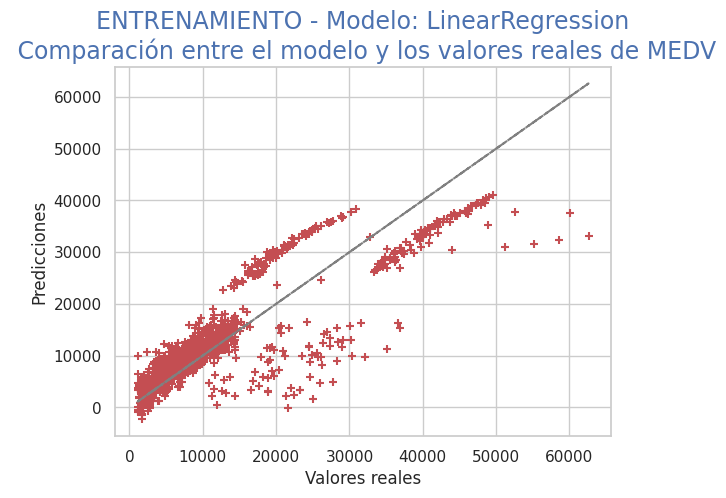

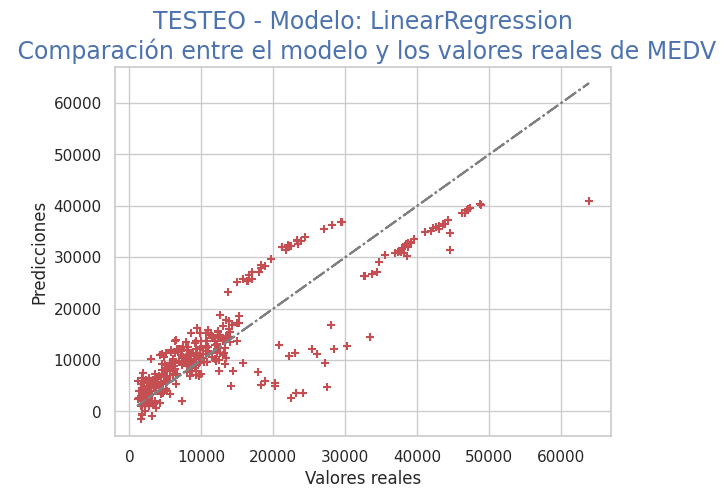

In [45]:
model_report(model = multilinear_model,
             y_train_pred = y_train_m_pred,
             y_test_pred = y_test_m_pred)

### Aplicamos el reporte al modelo de svr

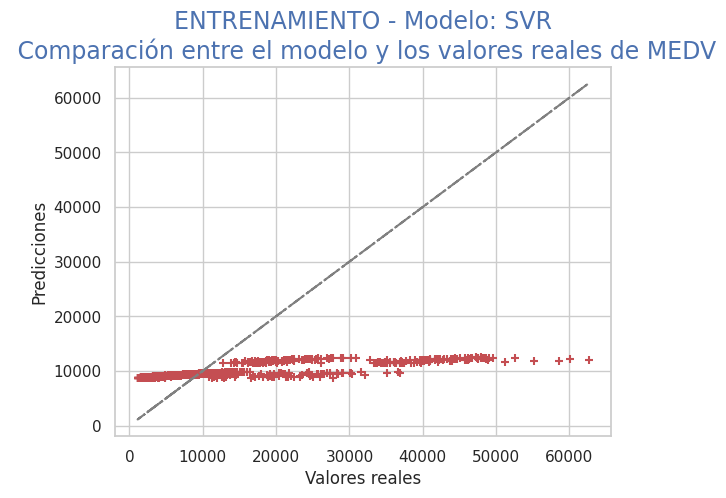

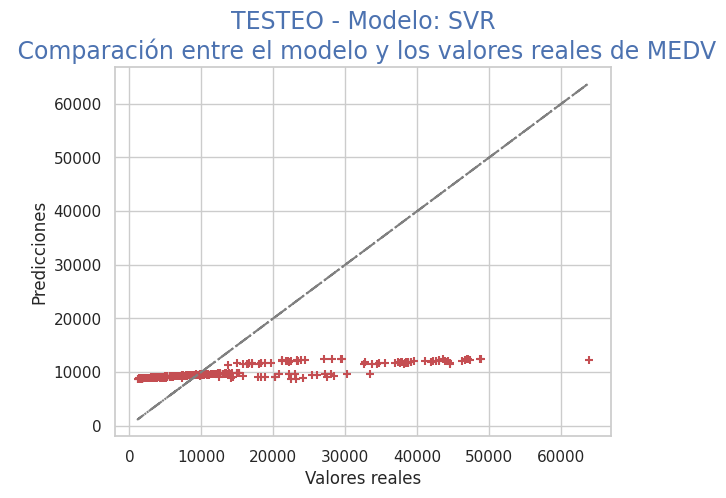

In [46]:
model_report(model = svr,
             y_train_pred = y_train_svr_pred,
             y_test_pred = y_test_svr_pred)

### Aplicamos el reporte al modelo de dt

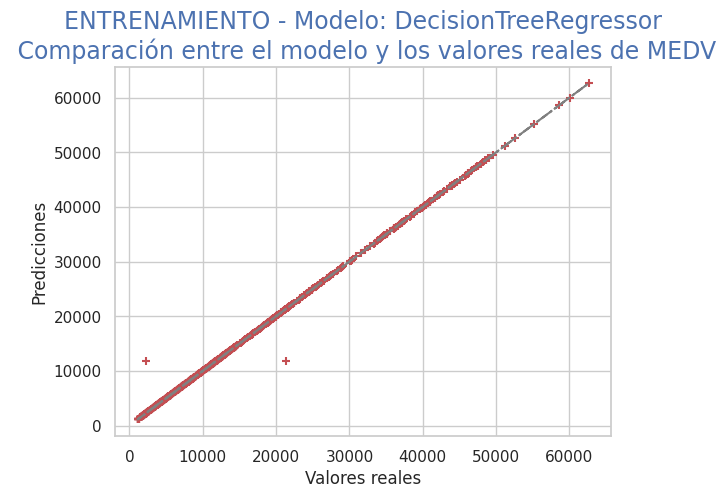

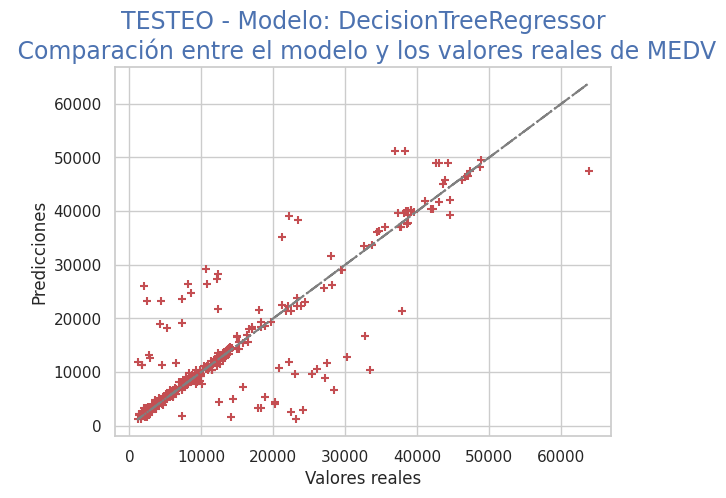

In [47]:
model_report(model = dt,
             y_train_pred = y_train_dt_pred,
             y_test_pred = y_test_dt_pred)